In [2]:
# !pip install orbit-ml -q

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import orbit
from orbit.utils.dataset import load_iclaims
from orbit.models import ETS
from orbit.diagnostics.plot import plot_predicted_data

In [4]:
df = load_iclaims()
date_col = 'week'
response_col = 'claims'
df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [5]:
df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [6]:
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]

In [7]:
ets = ETS(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=8888,
)

In [8]:
%%time
ets.fit(df=train_df)

2024-01-23 16:13:13 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
2024-01-23 16:13:13 - orbit - INFO - First time in running stan model:ets. Expect 3 - 5 minutes for compilation.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

                                                                                                                                                                                                                                                                                                                                
CPU times: user 225 ms, sys: 19.5 ms, total: 245 ms
Wall time: 18.3 s


In [9]:
predicted_df = ets.predict(df=test_df)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

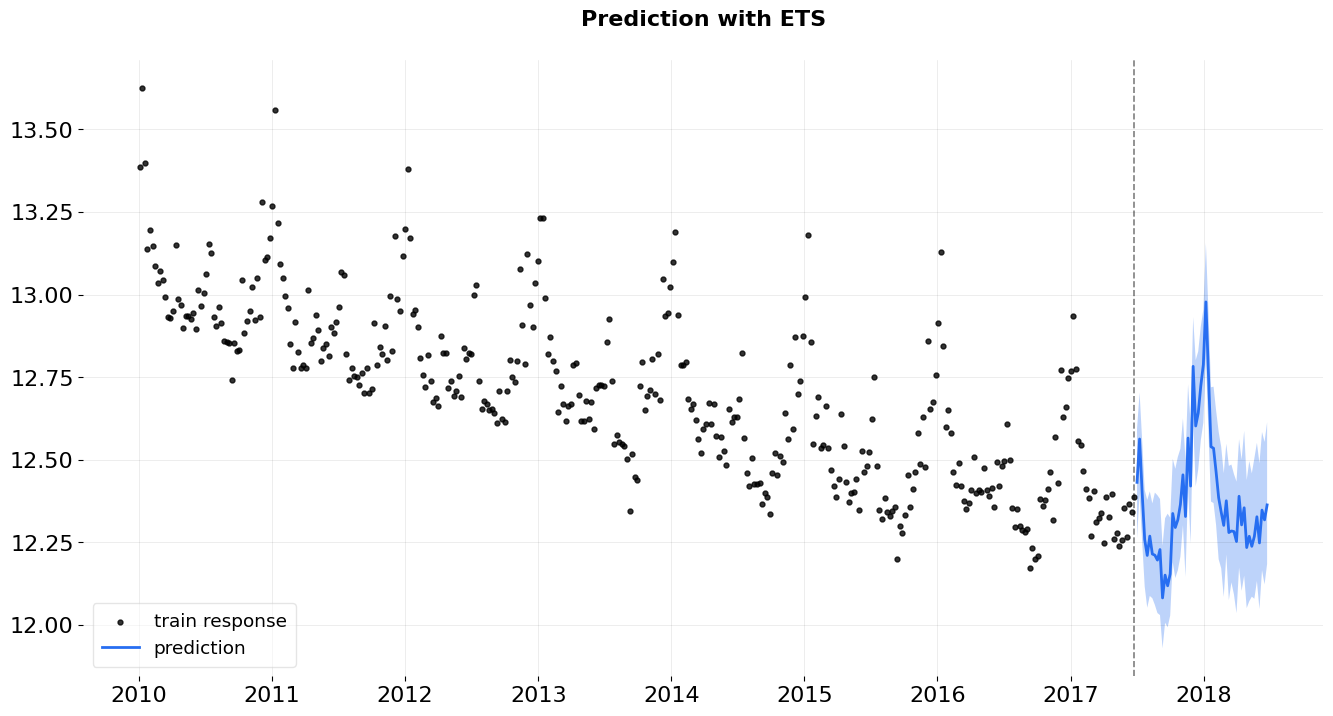

In [10]:
_ = plot_predicted_data(train_df, predicted_df, date_col, response_col, title='Prediction with ETS')

## Модель DLT - Damped Local Trend

[Документация](https://orbit-ml.readthedocs.io/en/latest/tutorials/dlt.html)

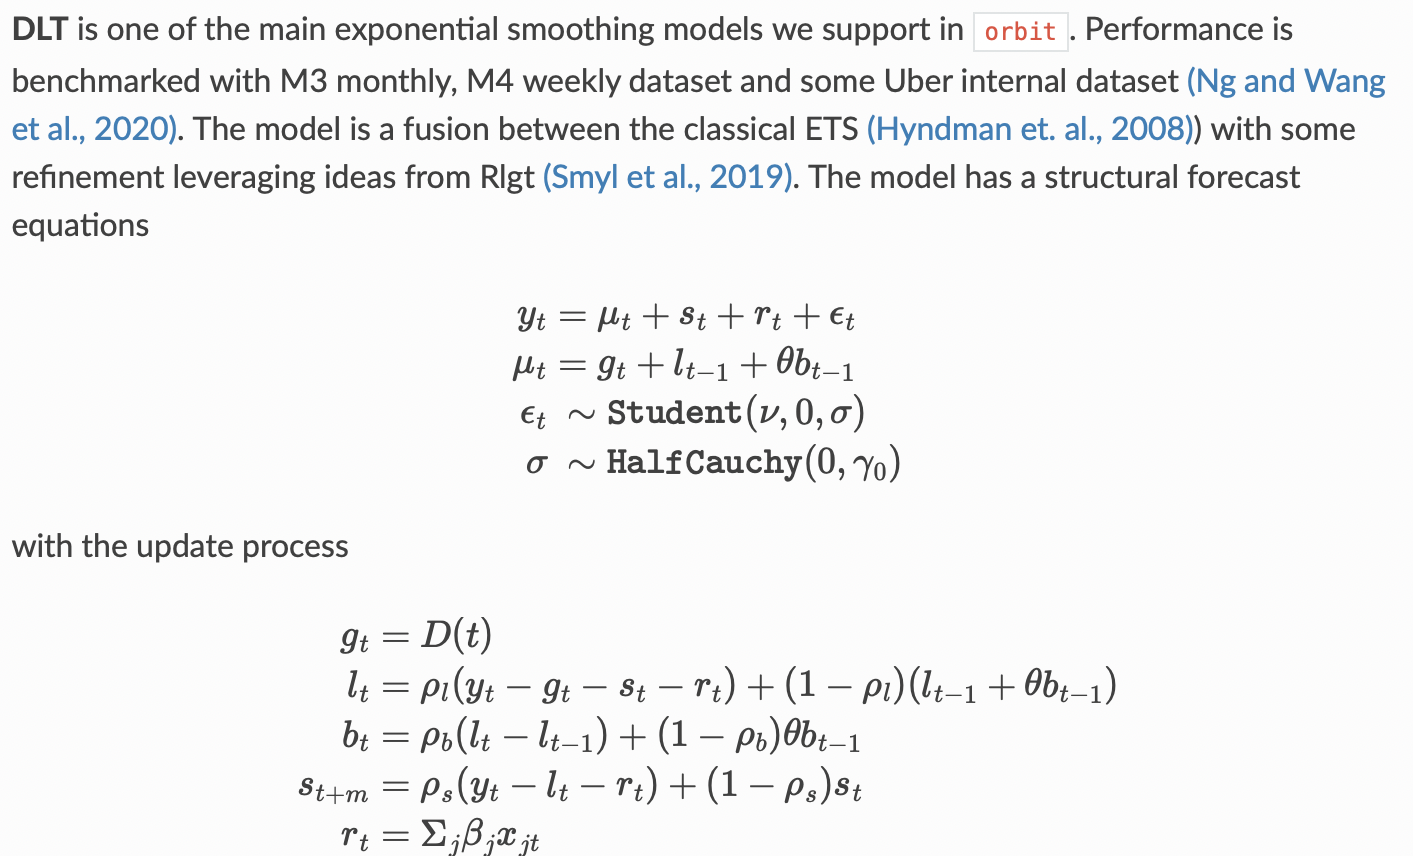

In [11]:
from orbit.models import DLT

dlt = DLT(
    response_col=response_col,
    date_col=date_col,
    estimator='stan-map',
    seasonality=52,
    seed=8888,
    global_trend_option='linear',
    # for prediction uncertainty
    n_bootstrap_draws=1000,
)

2024-01-23 16:13:42 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


In [12]:
%%time
dlt.fit(df=train_df)

2024-01-23 16:13:42 - orbit - INFO - First time in running stan model:dlt. Expect 3 - 5 minutes for compilation.


CPU times: user 45.9 ms, sys: 5.17 ms, total: 51.1 ms
Wall time: 41.9 s


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

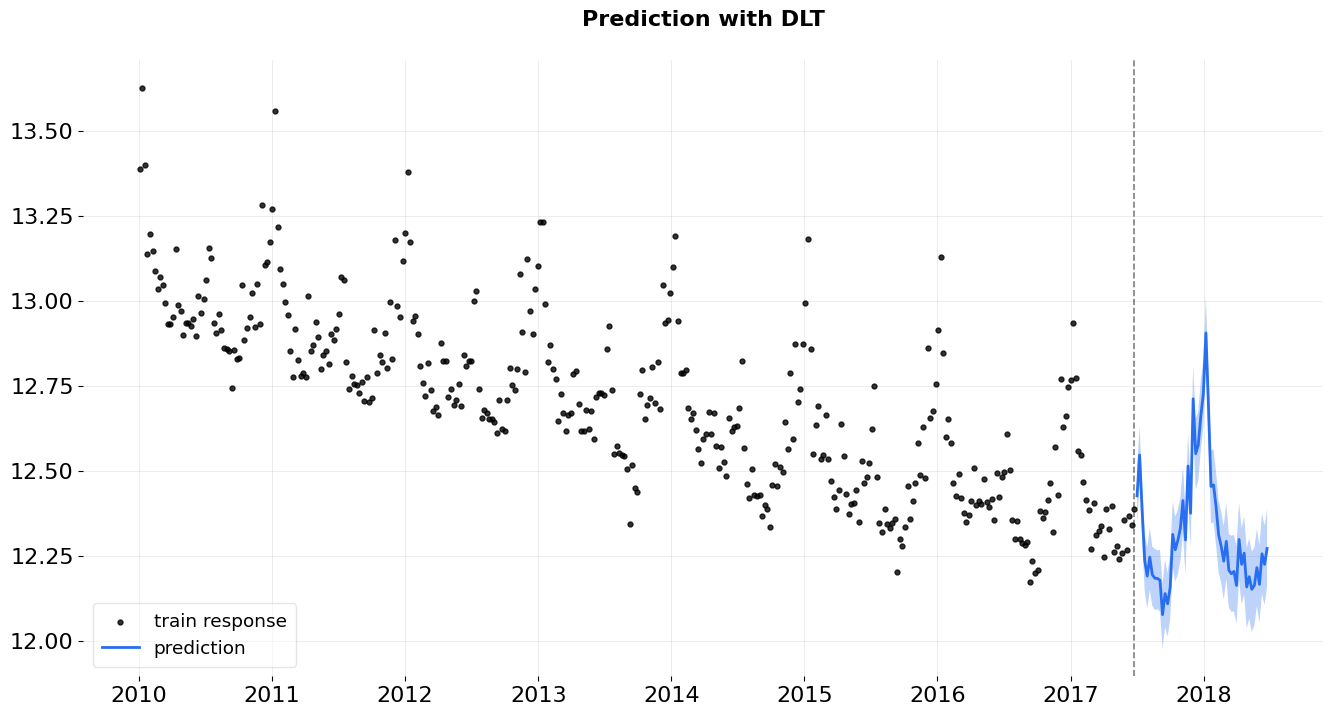

In [13]:
predicted_dlt_df = dlt.predict(df=test_df)

_ = plot_predicted_data(train_df, predicted_dlt_df, date_col, response_col, title='Prediction with DLT');

## Модель LGT - Local Global Trend

[Документация](https://orbit-ml.readthedocs.io/en/latest/tutorials/lgt.html)

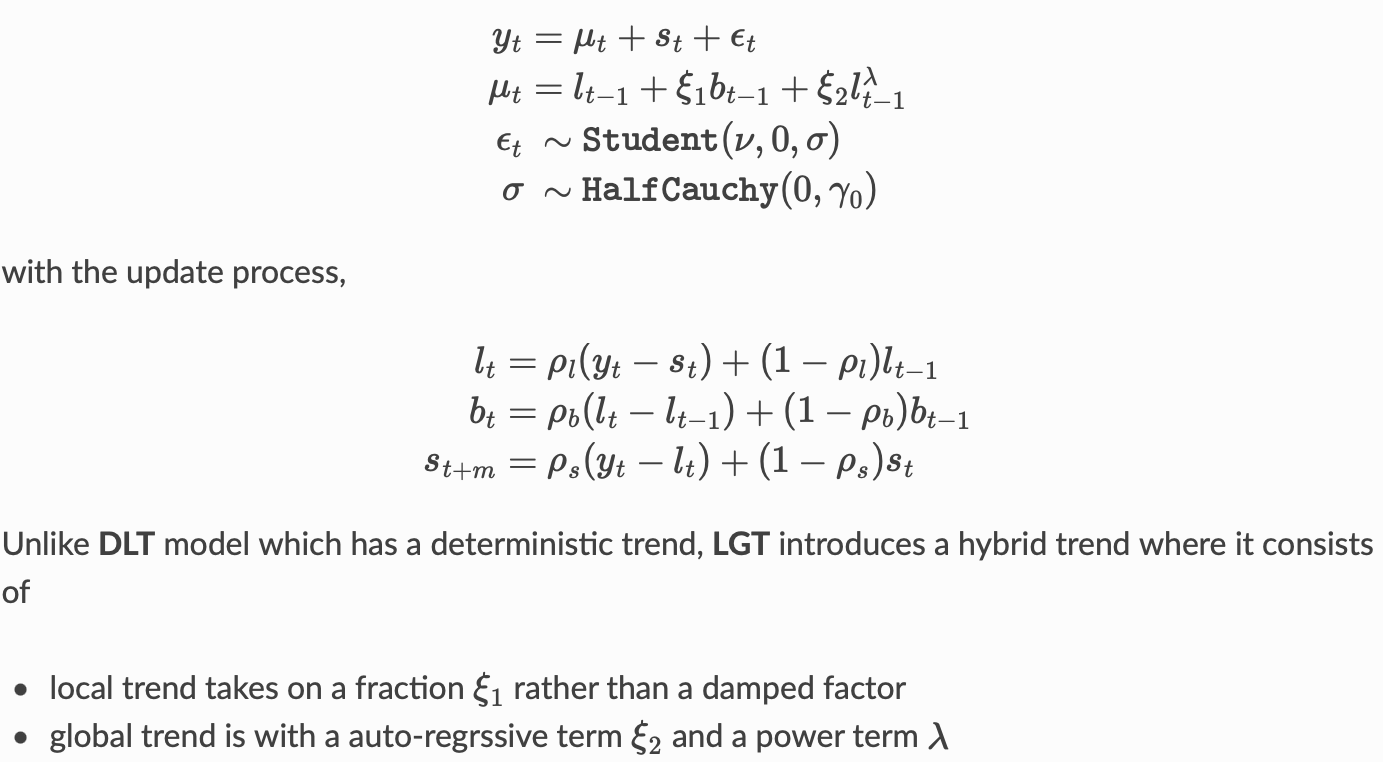

In [14]:
from orbit.models import LGT

lgt = LGT(
    response_col=response_col,
    date_col=date_col,
    estimator='stan-map',
    seasonality=52,
    seed=8888)

2024-01-23 16:14:42 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


In [15]:
%%time
lgt.fit(df=train_df)

2024-01-23 16:14:43 - orbit - INFO - First time in running stan model:lgt. Expect 3 - 5 minutes for compilation.


CPU times: user 37.7 ms, sys: 3.2 ms, total: 40.9 ms
Wall time: 39.5 s


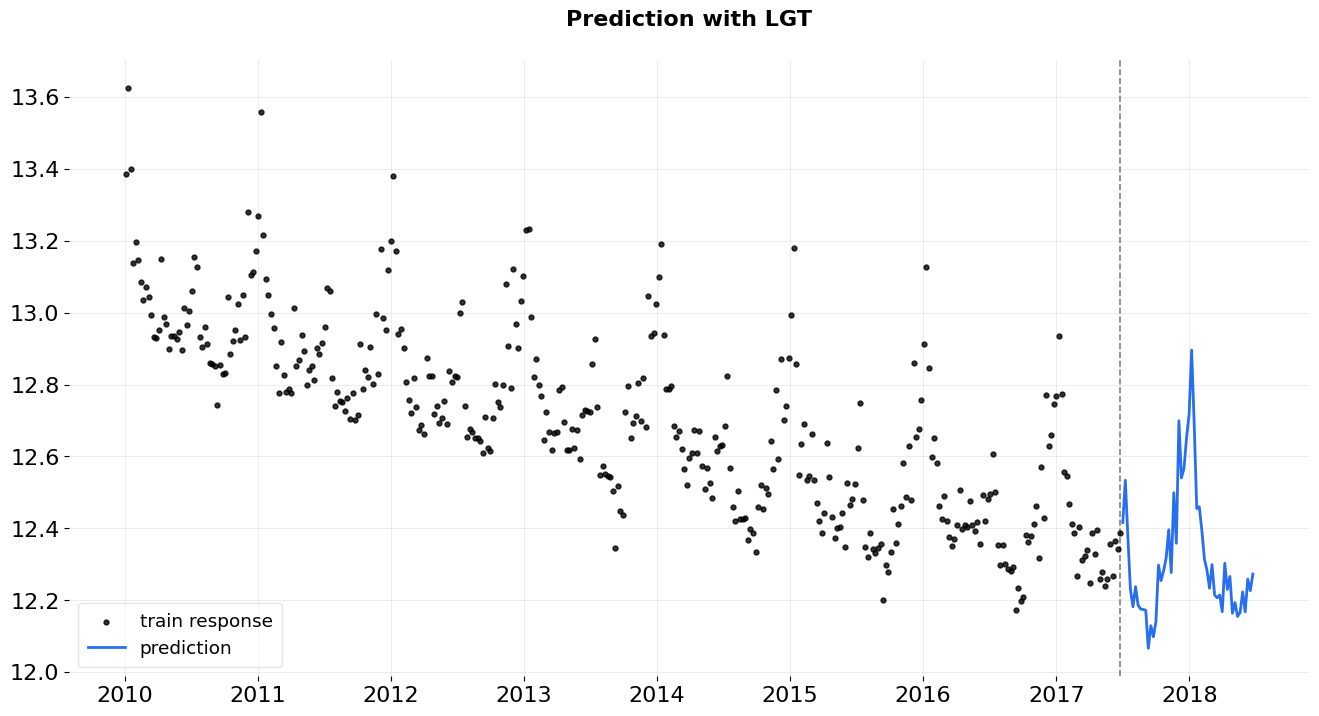

In [ ]:
predicted_lgt_df = lgt.predict(df=test_df)

_ = plot_predicted_data(train_df, predicted_lgt_df, date_col, response_col, title='Prediction with LGT');